# Economy Analysis

### Introduction

### About Financial Data

<br>

##### Collecting financial data (Import CSV file)
<br>
- NASDAQ (NASDAQCOM) : 미국 나스닥 INDEX

-  10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity (T10Y2Y) : 10년물/2년물 채권 장단기 금리차
-  10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity (T10Y3M) : 10년물/3개월물 채권 장단기 금리차
-  Federal Funds Effective Rate (`FEDFUNDS`) : 미국 연방 기금 금리 (정책 금리)
-  New Privately-Owned Housing Units Started: Total Units (HOUST) : 미국 신규 주택 착공 (Annual Increase Rate)_
-  All Employees, Total Nonfarm (PAYEMS) : 미국 고용 인구 (비농업) _(Annual Increase Rate)_
-  Unemployment Rate (UNRATE) : 미국 실업률
-  Real Gross Domestic Product (GDPC1) : 미국 GDP 성장률 
-  ICE BofA US High Yield Index Option-Adjusted Spread (BAMLH0A0HYM2) : 투자 등급 BB 이하 미만(투자 등급 부적격)인 채권과 국채 현물의 수익률 차이
- Personal Consumption Expenditures Excluding Food and Energy (Chain-Type Price Index) (PCEPILFE) : 미국 근원 물가 지수 (원유, 식료품 제외)

<p style="text-align: center;">
  <small>
        [Reference <a href="https://www.youtube.com/watch?v=fdT5IVlquDs">[홍춘욱의 경제 강의 노트 75 - 장단기 역전의 의미]</a>]<br>
        [Reference <a href="https://www.youtube.com/watch?v=xs7E_cHFgco&list=WL&index=10&t=1240s">[미국 증시 진짜 하락을 알 수 있는 1가지 신호 - 소수몽키]</a>]
  </small>
</p>
      
<br>      


   <img src="https://fred.stlouisfed.org/graph/fredgraph.png?g=NT8v">

   <img src="https://fred.stlouisfed.org/graph/fredgraph.png?g=OdFs">
   <br>
<p style="text-align: center;">
  <small>
    [See <a href="https://fred.stlouisfed.org/">[FED - US Economics State Index]</a>]
  </small>
</p>
<br>
   

### Import Python Library
- pandas
- numpy
- matplotlib
- FinanceDataReader (FRED)

<br>

#### Setting Plot Parameter
- font, grid, figsize, offset etc.

In [1]:
import pandas as pd
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Change graph background Color
sns.set_style("whitegrid")

# Font
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [2]:
# Import all data
df = fdr.DataReader(['NASDAQCOM', 'T10Y2Y','T10Y3M', 'FEDFUNDS', 'PAYEMS', 'HOUST', 'GDPC1', 'UNRATE', 'BAMLH0A0HYM2', 'PCEPILFE'], data_source="fred")
df.to_csv("/mnt/d/PythonWorkspace/my_github/automation/us_economic_analysis/results/raw_data.csv",mode='w')
df.head()

,T10Y2Y,T10Y3M,NASDAQCOM,BAMLH0A0HYM2,FEDFUNDS,PAYEMS,HOUST,UNRATE,PCEPILFE,GDPC1
DATE,,,,,,,,,,
1970-01-01,NaN,NaN,NaN,NaN,8.98,71176.0,1085.0,3.9,21.608,4939.759
1970-02-01,NaN,NaN,NaN,NaN,8.98,71305.0,1305.0,4.2,21.691,4939.759
1970-03-01,NaN,NaN,NaN,NaN,7.76,71451.0,1319.0,4.4,21.772,4939.759
1970-04-01,NaN,NaN,NaN,NaN,8.10,71348.0,1264.0,4.6,21.857,4946.770
1970-05-01,NaN,NaN,NaN,NaN,7.95,71124.0,1290.0,4.8,21.934,4946.770


### Data Pre-processing
<br>

#### How to deal with data?

<br>

- NASDAQ, T10Y2Y, T10Y3M, BAMLH0A0HYM2 : View daily data
- FEDFUNDS, UNRATE : View Monthly Average Data
- HOUST, PAYEMS, PCEPILFE : View Monthly Average Data Percent Change Year-over-Year
- GDPC1 : View quaterly data Percent Change Year-over-Year


In [3]:
dfmonth = df.groupby(pd.Grouper(freq="M"))['HOUST', 'PAYEMS', 'PCEPILFE'].mean()

for x in ['HOUST', 'PAYEMS', 'PCEPILFE']:
    index = x + "_monthly_yoy"
    diff_yoy = round((dfmonth[x] - dfmonth[x].shift(12))/dfmonth[x].shift(12)*100,2)
    dfmonth[index] = diff_yoy

dfmonth.head() # The HOUST_monthly_yoy PAYEMS_monthly_yoy data is nan in 1970.

/home/chahohyun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,HOUST,PAYEMS,PCEPILFE,HOUST_monthly_yoy,PAYEMS_monthly_yoy,PCEPILFE_monthly_yoy
DATE,,,,,,
1970-01-31,1085.0,71176.0,21.608,NaN,NaN,NaN
1970-02-28,1305.0,71305.0,21.691,NaN,NaN,NaN
1970-03-31,1319.0,71451.0,21.772,NaN,NaN,NaN
1970-04-30,1264.0,71348.0,21.857,NaN,NaN,NaN
1970-05-31,1290.0,71124.0,21.934,NaN,NaN,NaN


In [4]:
dfquarter = df.groupby(pd.Grouper(freq="Q"))['GDPC1'].mean()
gdp_quarter_yoy = round((dfquarter - dfquarter.shift(4))/dfquarter.shift(4)*100, 2)
gdp_quarter_yoy.head() # The GDPC1 data is nan in 1970.

DATE
1970-03-31    NaN
1970-06-30    NaN
1970-09-30    NaN
1970-12-31    NaN
1971-03-31    2.7
Freq: Q-DEC, Name: GDPC1, dtype: float64

In [5]:
dfmonth = dfmonth.drop(["HOUST","PAYEMS", 'PCEPILFE'], axis=1)
df1 = pd.merge(dfmonth, gdp_quarter_yoy, how='left', on="DATE")
df1['GDPC1'] = df1['GDPC1'].fillna(method='ffill').fillna(method='bfill')
df1 = df1.rename(columns={'GDPC1':'GDP_quaterly_yoy'})
df1.head()

,HOUST_monthly_yoy,PAYEMS_monthly_yoy,PCEPILFE_monthly_yoy,GDP_quaterly_yoy
DATE,,,,
1970-01-31,NaN,NaN,NaN,2.7
1970-02-28,NaN,NaN,NaN,2.7
1970-03-31,NaN,NaN,NaN,2.7
1970-04-30,NaN,NaN,NaN,2.7
1970-05-31,NaN,NaN,NaN,2.7


In [6]:
df = df.drop(["PAYEMS", "HOUST", "GDPC1"], axis=1)
total_data = pd.merge(df, df1, how='left', on="DATE")

for x in ['HOUST_monthly_yoy', 'PAYEMS_monthly_yoy', 'GDP_quaterly_yoy', 'PCEPILFE_monthly_yoy']:
    total_data[x] = total_data[x].fillna(method='bfill')

# Change Scale
total_data['HOUST_monthly_yoy_0.1'] = total_data['HOUST_monthly_yoy']/10
total_data = total_data.drop('HOUST_monthly_yoy', axis=1)
total_data.head()

,T10Y2Y,T10Y3M,NASDAQCOM,BAMLH0A0HYM2,FEDFUNDS,UNRATE,PCEPILFE,PAYEMS_monthly_yoy,PCEPILFE_monthly_yoy,GDP_quaterly_yoy,HOUST_monthly_yoy_0.1
DATE,,,,,,,,,,,
1970-01-01,NaN,NaN,NaN,NaN,8.98,3.9,21.608,-0.83,4.97,2.7,4.481
1970-02-01,NaN,NaN,NaN,NaN,8.98,4.2,21.691,-0.83,4.97,2.7,4.481
1970-03-01,NaN,NaN,NaN,NaN,7.76,4.4,21.772,-0.83,4.97,2.7,4.481
1970-04-01,NaN,NaN,NaN,NaN,8.10,4.6,21.857,-0.83,4.97,2.7,4.481
1970-05-01,NaN,NaN,NaN,NaN,7.95,4.8,21.934,-0.83,4.97,2.7,4.481


### Exploratory Data Analysis (EDA)

#### Visualization

##### NASDAQ

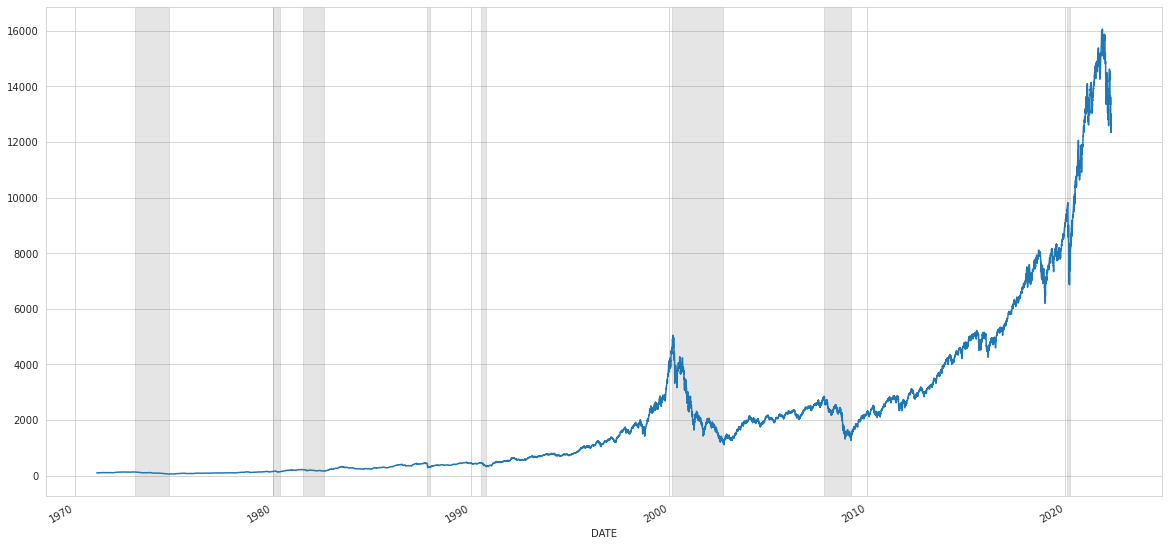

In [27]:
ax = total_data["NASDAQCOM"].plot()

# First Energy Crisis - Inflation
ax.axvspan('1973-01-04', '1974-10-01', color='gray', alpha=0.2)
# Second Energy Crisis - Inflation
ax.axvspan('1980-01-01', '1980-05-01', color='gray', alpha=0.2)
# Double Dip Recession - Inflation
ax.axvspan('1981-07-01', '1982-08-01', color='gray', alpha=0.2)
# Black Monday
ax.axvspan('1987-10-01', '1987-12-10', color='gray', alpha=0.2)
# The Gulf-War
ax.axvspan('1990-07-01', '1990-10-01', color='gray', alpha=0.2)
# Dot-com Bubble
ax.axvspan('2000-03-01', '2002-09-30', color='gray', alpha=0.2)
# SubPrime Mortgage Crisis
ax.axvspan('2007-11-01', '2009-03-06', color='gray', alpha=0.2)
# Covid 19
ax.axvspan('2020-02-01', '2020-03-23', color='gray', alpha=0.2)

- Purpose: Analysis of economic crises requiring significant portfolio changes.

It is difficult to identify historical data due to the rapid increase in Nasdaq Index.
So let's look at the 1900's and 2000's separately.


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


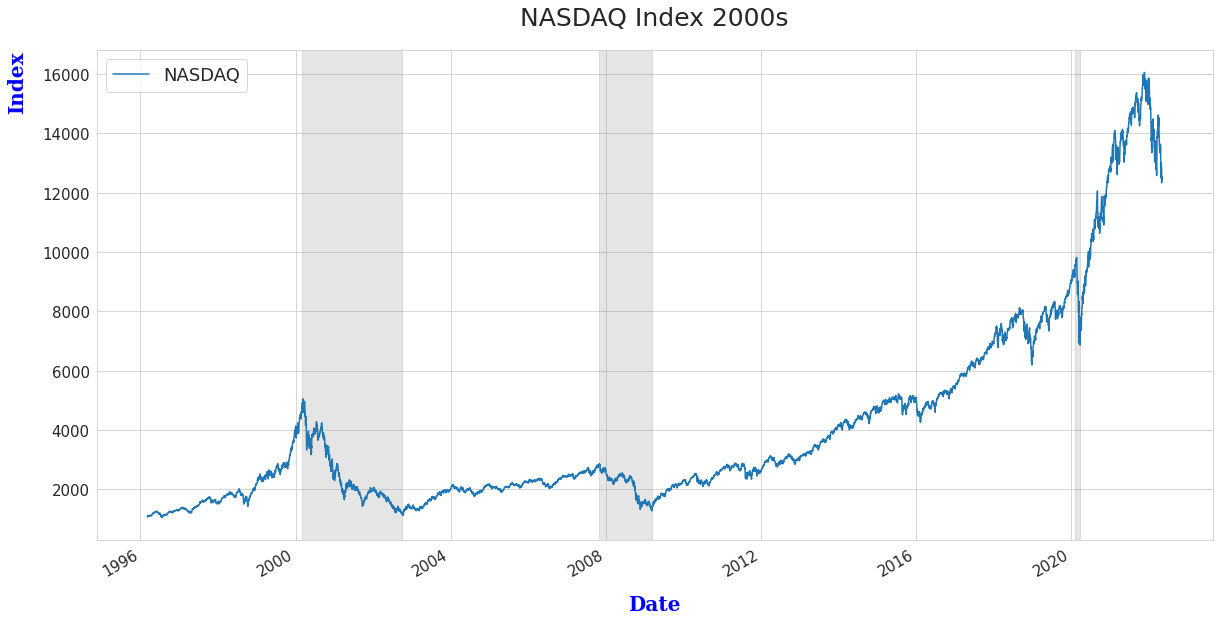

In [8]:
# 1995 ~ 2022 years
af_00 = total_data["NASDAQCOM"].iloc[-7000:].plot(label="NASDAQ")

# Dot-com Bubble
af_00.axvspan('2000-03-01', '2002-09-30', color='gray', alpha=0.2)
# SubPrime Mortgage Crisis
af_00.axvspan('2007-11-01', '2009-03-06', color='gray', alpha=0.2)
# Covid 19
af_00.axvspan('2020-02-01', '2020-03-23', color='gray', alpha=0.2)

plt.legend(loc='upper left', fontsize=18)
plt.title('NASDAQ Index 2000s', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Index', fontsize=20, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')
plt.xticks(fontsize = 15)
plt.yticks(fontsize =15)
plt.savefig('../us_economic_analysis/results/NASDAQ_Index_20th')

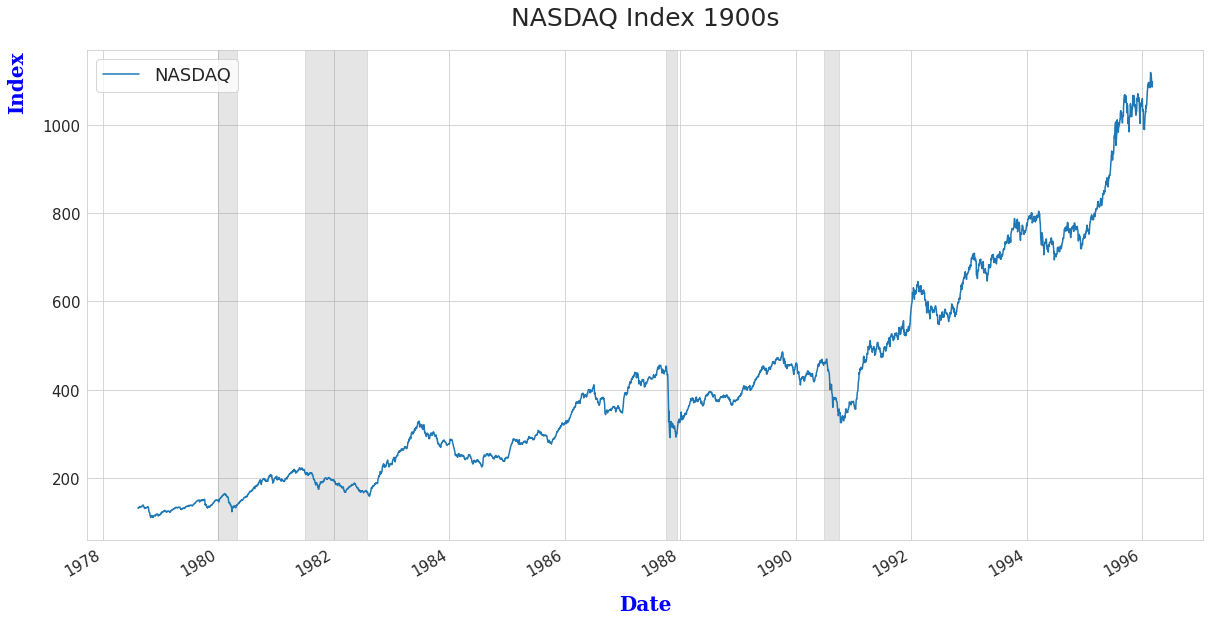

In [9]:
# 1980 ~ 1995 years
bf_00 = total_data["NASDAQCOM"].iloc[2000:-7000].plot(label="NASDAQ")

# Second Energy Crisis - Inflation
bf_00.axvspan('1980-01-01', '1980-05-01', color='gray', alpha=0.2)
# Double Dip Recession - Inflation
bf_00.axvspan('1981-07-01', '1982-08-01', color='gray', alpha=0.2)
# Black Monday
bf_00.axvspan('1987-10-01', '1987-12-10', color='gray', alpha=0.2)
# The Gulf-War
bf_00.axvspan('1990-07-01', '1990-10-01', color='gray', alpha=0.2)

plt.legend(loc='upper left', fontsize=18)
plt.title('NASDAQ Index 1900s', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Index', fontsize=20, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')
plt.xticks(fontsize = 15)
plt.yticks(fontsize =15)
plt.savefig('../us_economic_analysis/results/NASDAQ_Index_19th')

- Reference : [미국의 경제 불황 역사: 1980년대](https://the-day-after-tomorrow.tistory.com/22)

#### How to predict a recession by ecnomic value?

#### Economic Index

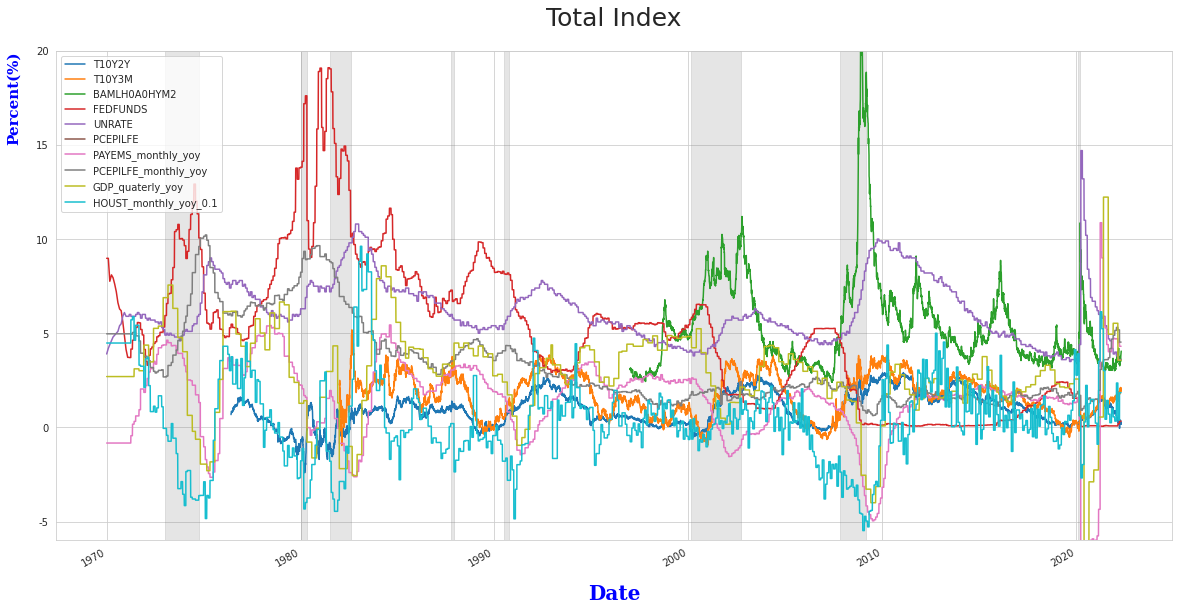

In [10]:
cols = list(total_data.columns.drop('NASDAQCOM'))
ax = total_data[cols].plot()

# First Energy Crisis - Inflation
ax.axvspan('1973-01-04', '1974-10-01', color='gray', alpha=0.2)
# Second Energy Crisis - Inflation
ax.axvspan('1980-01-01', '1980-05-01', color='gray', alpha=0.2)
# Double Dip Recession - Inflation
ax.axvspan('1981-07-01', '1982-08-01', color='gray', alpha=0.2)
# Black Monday
ax.axvspan('1987-10-01', '1987-12-10', color='gray', alpha=0.2)
# The Gulf-War
ax.axvspan('1990-07-01', '1990-10-01', color='gray', alpha=0.2)
# Dot-com Bubble
ax.axvspan('2000-03-01', '2002-09-30', color='gray', alpha=0.2)
# SubPrime Mortgage Crisis
ax.axvspan('2007-11-01', '2009-03-06', color='gray', alpha=0.2)
# Covid 19
ax.axvspan('2020-02-01', '2020-03-23', color='gray', alpha=0.2)

plt.legend(loc='upper left', fontsize=10)
plt.ylim(-6, 20)
plt.title('Total Index', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Percent(%)', fontsize=15, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')
plt.savefig('../us_economic_analysis/results/Total Figure')

Analyze in detail by each period and index.

1. Index

- FEDFUNDS, T10Y2Y, T10Y3M, GDPC1 <br>
  * Critical Point 1 : GDPC1 < Average GDP in period
  * Critical Point 2 : T10Y2Y & T10Y3M < 0
- FEDFUNDS, UNRATE, PAYEMS, HOUST
  * Critical Point : UNRATE < Average UNRATE in period
- FEDFUNDS, BAMLH0A0HYM2, PCEPILFE
  * Critical Point : UNRATE < Average UNRATE in period
  
  ※ However, the Average Index takes the value before the each crisis.

<br>

2.Period

- 2012 ~ 2022
- 2003 ~ 2012
- 1996 ~ 2003
+ Inflation Period

<br>

+ Inflation Period (1970 ~ 1985)
 - First Energy Crisis - Inflation ('1973-01-04', '1974-10-01')
 - Second Energy Crisis - Inflation ('1980-01-01', '1980-05-01')
 - Double Dip Recession - Inflation ('1981-07-01', '1982-08-01')

In [11]:
# Datetime -> year, month, day for data pre-processing
total_data.reset_index(inplace=True)
total_data['year'] = total_data['DATE'].dt.year
total_data['month'] = total_data['DATE'].dt.month
total_data['day'] = total_data['DATE'].dt.day

# Change Scale
total_data["GDP_quaterly_yoy_0.2"] = total_data['GDP_quaterly_yoy'] * 0.2

In [12]:
# Find the average of non-recession periods for GDP Groth & Unrate rate

covid_start = total_data.loc[(total_data["year"] == 2020) & (total_data["month"] == 2) & (total_data["day"] == 1)].index.tolist()[0]
subprime_end = total_data.loc[(total_data["year"] == 2009) & (total_data["month"] == 3) & (total_data["day"] == 6)].index.tolist()[0]

subprime_start = total_data.loc[(total_data["year"] == 2007) & (total_data["month"] == 11) & (total_data["day"] == 1)].index.tolist()[0]
dotbubble_end = total_data.loc[(total_data["year"] == 2002) & (total_data["month"] == 9) & (total_data["day"] == 30)].index.tolist()[0]

dotbubble_start = total_data.loc[(total_data["year"] == 2000) & (total_data["month"] == 3) & (total_data["day"] == 1)].index.tolist()[0]
gulf_end = total_data.loc[(total_data["year"] == 1994) & (total_data["month"] == 10) & (total_data["day"] == 1)].index.tolist()[0]

gdp_avg1 = total_data.iloc[subprime_end : covid_start,:]["GDP_quaterly_yoy_0.2"].mean()
unrate_avg1 = total_data.iloc[subprime_end : covid_start,:]["UNRATE"].mean()

gdp_avg2 = total_data.iloc[dotbubble_end : subprime_start,:]["GDP_quaterly_yoy_0.2"].mean()
unrate_avg2 = total_data.iloc[dotbubble_end : subprime_start,:]["UNRATE"].mean()

gdp_avg3 = total_data.iloc[gulf_end : dotbubble_start,:]["GDP_quaterly_yoy_0.2"].mean()
unrate_avg3 = total_data.iloc[gulf_end : dotbubble_start,:]["UNRATE"].mean()

total_data.set_index("DATE", inplace=True)

In [13]:
print({"covid" : (round(gdp_avg1,2),round(unrate_avg1,2)),
       "sub-prime" : (round(gdp_avg2,2), round(unrate_avg2,2)), 
       "dotcom-bubble" : (round(gdp_avg3,2), round(unrate_avg3,2))})

{'covid': (0.36, 6.45), 'sub-prime': (0.59, 5.21), 'dotcom-bubble': (0.81, 4.93)}


미국의 경제 체력이 점점 낮아짐

#### Covid 19 Crisis

Text(0, 1, 'Percent(%)')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


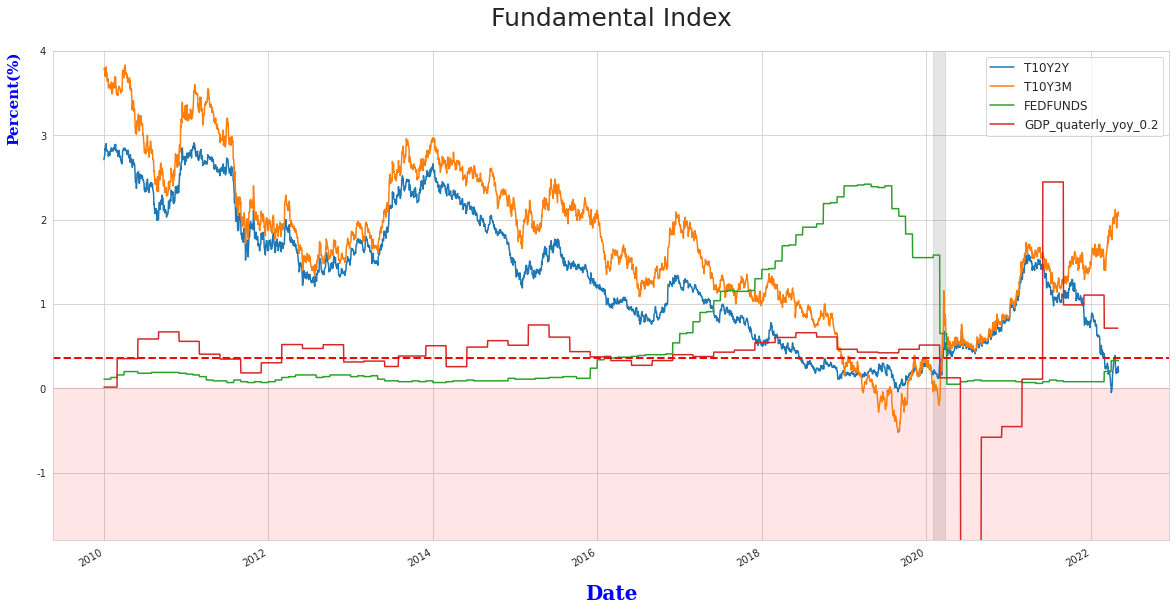

In [14]:
df_rct = total_data.loc[total_data['year'] >= 2010]

ax = df_rct[["T10Y2Y", "T10Y3M", "FEDFUNDS", 'GDP_quaterly_yoy_0.2']].plot()
# gdp_avg

# Recent Period GDP Average Groth Rate
plt.axhline(gdp_avg1, 0, 1, color='red', linestyle='--', linewidth=2)

# Covid 19
ax.axvspan('2020-02-01', '2020-03-23', color='gray', alpha=0.2)
# Treasury < 0
ax.axhspan(0,-2, color='red', alpha=0.1)

plt.ylim(-1.8, 4)
plt.legend(loc='upper right', fontsize=12)
plt.title('Fundamental Index', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Percent(%)', fontsize=15, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')

In [55]:
high = df_rct.loc[(df_rct["month"] == 2) & (df_rct["year"] == 2020)]['NASDAQCOM'].max()
low = df_rct.loc[(df_rct["year"] == 2020)]['NASDAQCOM'].min()
mdd = round((low - high)/high*100,2)
print("NASDAQ MDD : " + str(mdd) + "%")

NASDAQ MDD : -30.12%


##### Detail Analysis 1

<br>

 - FEDFUNDS : Increase from 2016 to 2019, Go sideways and then Decreasing to second half of 2019
 - T10Y2Y & T10Y3M : Below Value 0 in second half of 2019
 - GDPC1 : Not related

 1) 장단기 금리차 (2년, 3개월) 모두 0보다 아래 값을 기록<br>
 2) 연준의 기준 금리는 인상을 거듭하다 동결 후, 인하를 실시하고 코로나 위기 발생<br>
   → 즉 경제 호황기엔 인상을 지속적으로 하다가 경기가 나빠질 기미가 보이자 인하하는 것으로 파악됨<br>
3) GDP 성장률은 경향성을 찾기 어려움

Text(0, 1, 'Percent(%)')

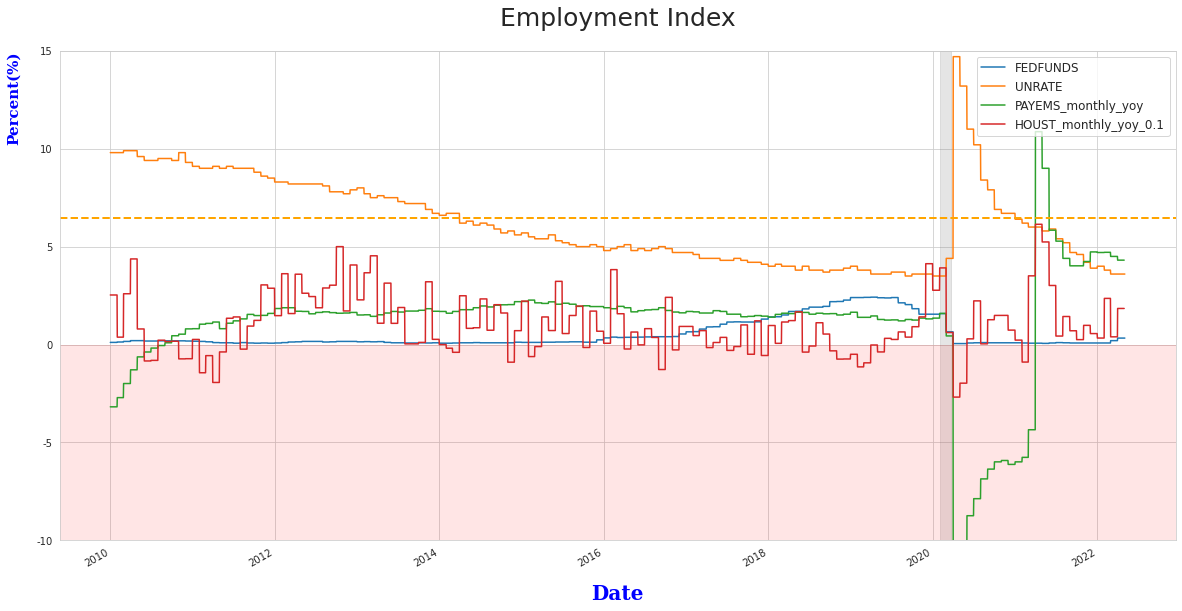

In [15]:
ax = df_rct[['FEDFUNDS','UNRATE', 'PAYEMS_monthly_yoy', 'HOUST_monthly_yoy_0.1']].plot()
# Recent Period UNRATE Average Rate
unrate_avg = df_rct['UNRATE'].mean()
# unrate_avg = total_data['UNRATE'].mean()

plt.axhline(unrate_avg1, 0, 1, color='orange', linestyle='--', linewidth=2)

# Covid 19
ax.axvspan('2020-02-01', '2020-03-23', color='gray', alpha=0.2)
# Treasury < 0
ax.axhspan(0,-10, color='red', alpha=0.1)

plt.ylim(-10, 15)
plt.legend(loc='upper right', fontsize=12)
plt.title('Employment Index', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Percent(%)', fontsize=15, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')
# plt.savefig('Total Figure')

##### Detail Analysis 2

<br>

 - FEDFUNDS : See upper
 - UNRATE, PAYEMS : Appear to be fully employed over time
 - HOUST : Not related

 1) 연준의 기준 금리 동결과 인하는 실업률과 고용률에 의해 일어난 것은 아님<br>
 2) 고용 지표는 매우 훌륭한 결과 값으로 보임<br>
      → 즉 경제 위기 전에 실업률은 완전 고용 형태로 나타남<br>
 3) 신규 주택 착공은 지속적으로 증가 추세임을 알 수 있다.

Text(0, 1, 'Percent(%)')

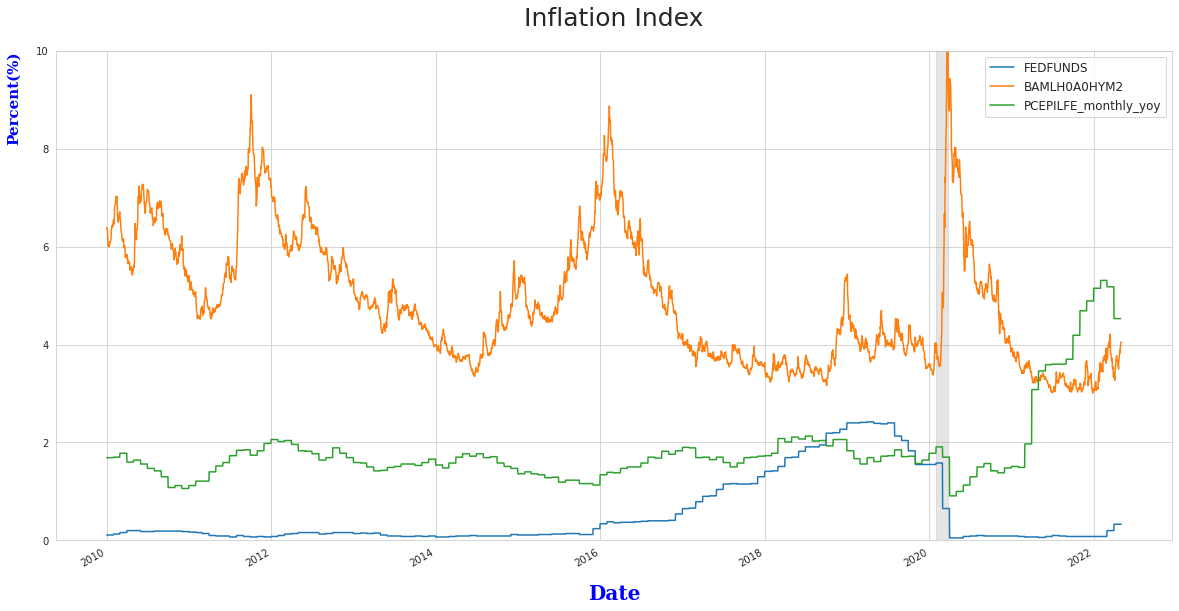

In [16]:
ax = df_rct[['FEDFUNDS','BAMLH0A0HYM2', 'PCEPILFE_monthly_yoy']].plot()

# Covid 19
ax.axvspan('2020-02-01', '2020-03-23', color='gray', alpha=0.2)

plt.ylim(0, 10)
plt.legend(loc='upper right', fontsize=12)
plt.title('Inflation Index', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Percent(%)', fontsize=15, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')

##### Detail Analysis 3

<br>

 - FEDFUNDS : See upper
 - BAMLH0A0HYM2 : Appear wide range of ups and downs (Not Realated)
 - PCEPILFE : averaged around 2% (Not Realated)

 1) 고위험군 회사채 Spread는 등락폭이 매우 큼<br>
 2) 미국 근원물가 지수는 평균 2%대로 유지됨을 알 수 있음

In [131]:
year = round(df_rct[(df_rct["T10Y2Y"] < 0) & (df_rct["T10Y2Y"] < 0)].iloc[0]["year"])
month = round(df_rct[(df_rct["T10Y2Y"] < 0) & (df_rct["T10Y2Y"] < 0)].iloc[0]["month"])
day = round(df_rct[(df_rct["T10Y2Y"] < 0) & (df_rct["T10Y2Y"] < 0)].iloc[0]["day"])
year1 = round(df_rct.loc[df_rct["FEDFUNDS"] - df_rct["FEDFUNDS"].shift(1) < - 0.1].iloc[0]["year"])
month1 = round(df_rct.loc[df_rct["FEDFUNDS"] - df_rct["FEDFUNDS"].shift(1) < - 0.1].iloc[0]["month"])
day1 = round(df_rct.loc[df_rct["FEDFUNDS"] - df_rct["FEDFUNDS"].shift(1) < - 0.1].iloc[0]["day"])
rate = round(df_rct["FEDFUNDS"].max(),2)
year2 = round(df_rct.loc[df_rct['UNRATE'] < 5].iloc[0]["year"])
month2 = round(df_rct.loc[df_rct['UNRATE'] < 5].iloc[0]["month"])
day2 = round(df_rct.loc[df_rct['UNRATE'] < 5].iloc[0]["day"])

print(f"NASDAQ Index MDD : {mdd}%")
print("Crisis Start from 2020년 2월 1일 to 2020년 3월 23일 for 2 months")
print(f"Treasury Value Below 0 Start date : {year}년 {month}월 {day}일")
print(f"FED rate down Start date : {year1}년 {month1}월 {day1}일, at max rate {rate}%")
print(f"GDP Groth Rate : Not Related")
print(f"UNRATE Rate Under Average date : {year2}년 {month2}월 {day2}일")
print(f"HOUST Rate : Not Related")

NASDAQ Index MDD : -77.93%
Crisis Start from 2020년 2월 1일 to 2020년 3월 23일 for 2 months
Treasury Value Below 0 Start date : 2019년 8월 27일
FED rate down Start date : 2019년 8월 1일, at max rate 2.42
GDP Groth Rate : Not Related
UNRATE Rate Under Average date : 2016년 1월 1일
HOUST Rate : Not Related


##### Conclusion 1 (Covid19 Crisis)

<br>

-  NASDAQ (NASDAQCOM) : Down 33% from highs 
-  T10Y2Y, T10Y3M : Below 0 value, ocuured Crisis after 6 months
-  Federal Funds Effective Rate (`FEDFUNDS`) : Increase, go sideways And then Decrease before Crisis
-  New Privately-Owned Housing Units Started: Total Units (HOUST) : Not related
-  PAYEMS, UNRATE : Fully be employed under the 5%
-  Real Gross Domestic Product (GDPC1) : Not related with Covid Crisis
-  BAMLH0A0HYM2 : Appear wide range of ups and downs many time (No tandancy)
-  PCEPILFE : Not important at this crisis

#### Sub-prime Mortgage Crisis

In [17]:
df_10s = total_data.loc[(total_data['year'] <= 2010) & (total_data['year'] >= 2003)]

In [57]:
high = df_10s.loc[df_10s["year"] == 2007]['NASDAQCOM'].max()
low = df_10s.loc[(df_10s["year"] == 2009)]['NASDAQCOM'].min()
mdd = round((low - high)/high*100,2)
print("NASDAQ MDD : " + str(mdd) + "%")

NASDAQ MDD : -55.63%


Text(0, 1, 'Percent(%)')

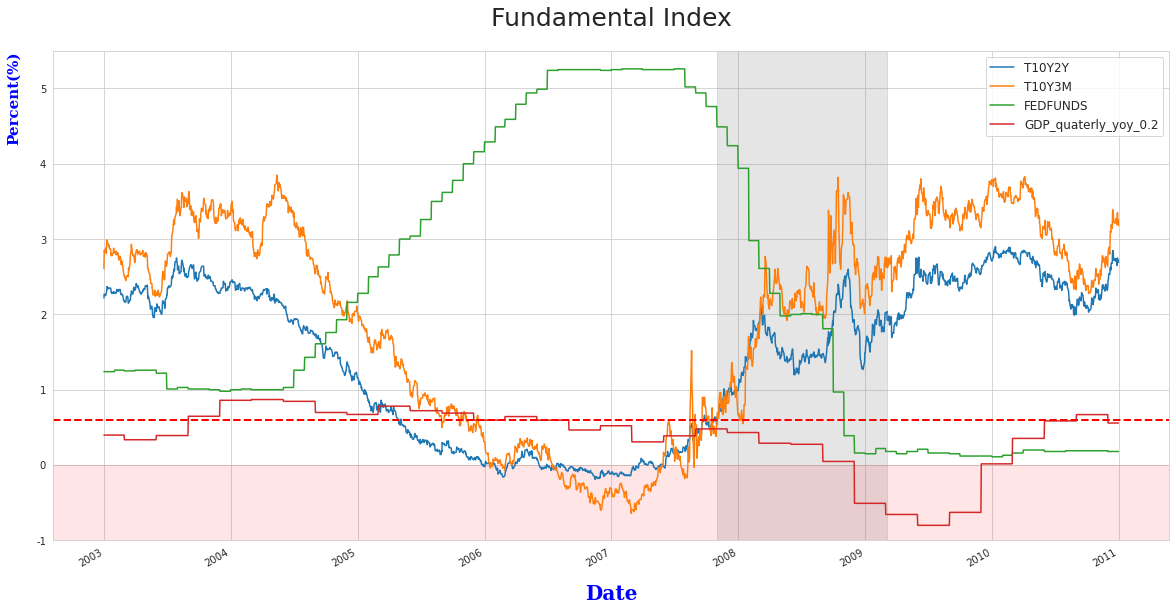

In [18]:
ax = df_10s[["T10Y2Y", "T10Y3M", "FEDFUNDS", 'GDP_quaterly_yoy_0.2']].plot()
# Recent Period GDP Average Groth Rate
gdp_avg = df_10s['GDP_quaterly_yoy_0.2'].mean()
plt.axhline(gdp_avg2, 0, 1, color='red', linestyle='--', linewidth=2)

# SubPrime Mortgage Crisis
ax.axvspan('2007-11-01', '2009-03-06', color='gray', alpha=0.2)
# Treasury < 0
ax.axhspan(0,-1, color='red', alpha=0.1)

plt.ylim(-1, 5.5)
plt.legend(loc='upper right', fontsize=12)
plt.title('Fundamental Index', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Percent(%)', fontsize=15, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')
# plt.savefig('Total Figure')

##### Detail Analysis 1

<br>

 - FEDFUNDS : Rapid increase from 2004 to 2006, Go sideways and then Decreasing to second half of 2007 (Same tendency as Covid 19) 
 - T10Y2Y & T10Y3M : Below Value 0 twice in early 2006 and more deeply middle 2006
 - GDPC1 : Lower than Average Gdp Groth rate

 1) 2년, 3개월물 장단기 금리차
   - 0보다 낮은 값을 기록 : 위기 예측 index
   - 두번 나타남 : 첫번째, 두번째?
   - Covid Crisis 대비 훨씬 낮은 값을 기록 : 값에 따라 낙폭이 비례?<br>
 2) 연준의 기준 금리는 인상을 거듭하다 동결 후, 인하를 실시하고 Sub-prime 위기 발생<br>
   → 즉 경제 호황기엔 인상을 지속적으로 하다가 경기가 나빠질 기미가 보이자 인하하는 것으로 파악됨 (원인 : GDP 성장률?)
   → Covid 19와 동일
 3) GDP 성장률 : Dot-com Bubble 이후 부터 Sub-prime 이전의 평균 값 이하로 내려옴

Text(0, 1, 'Percent(%)')

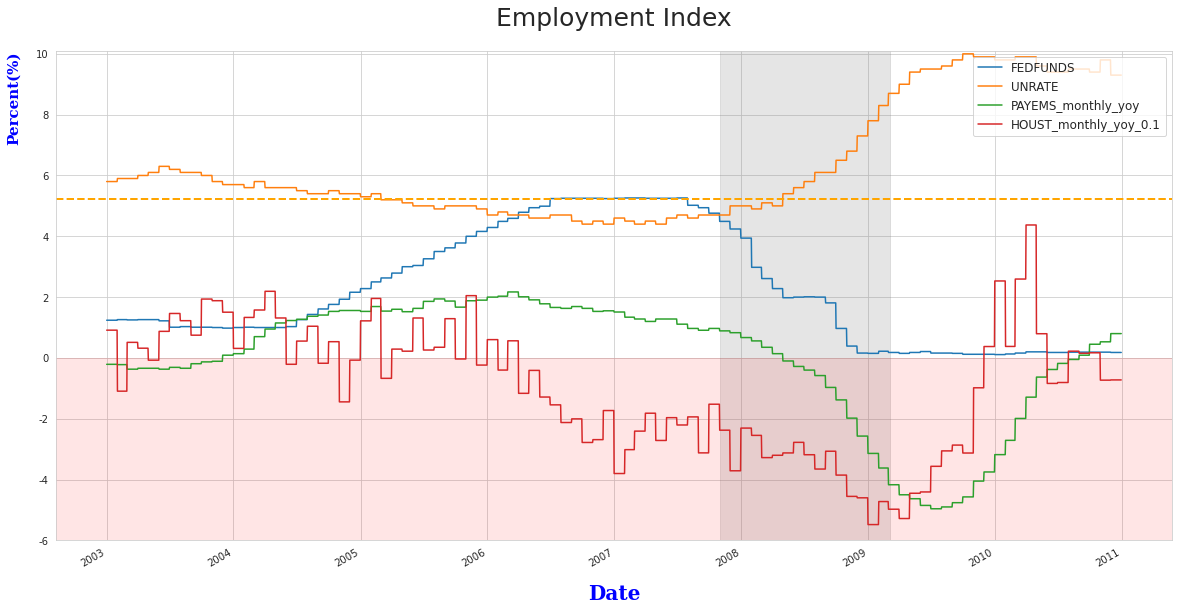

In [19]:
ax = df_10s[['FEDFUNDS','UNRATE', 'PAYEMS_monthly_yoy', 'HOUST_monthly_yoy_0.1']].plot()
# 10s Period UNRATE Average Rate
unrate_avg = df_10s['UNRATE'].mean()

plt.axhline(unrate_avg2, 0, 1, color='orange', linestyle='--', linewidth=2)

# SubPrime Mortgage Crisis
ax.axvspan('2007-11-01', '2009-03-06', color='gray', alpha=0.2)
# Treasury < 0
ax.axhspan(0,-6, color='red', alpha=0.1)

plt.ylim(-6, 10.1)
plt.legend(loc='upper right', fontsize=12)
plt.title('Employment Index', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Percent(%)', fontsize=15, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')

##### Detail Analysis 2

<br>

 - FEDFUNDS : See upper
 - UNRATE, PAYEMS : Appear to be fully employed over time
 - HOUST : Not related

 1) 연준의 기준 금리 동결과 인하는 실업률과 고용률에 의해 일어난 것은 아님<br>
 2) 고용 지표는 완전 고용 상태의 값으로 보임<br>
      → Covid19와 동일하게 완전 고용 후, 위기 발생<br>
 3) 신규 주택 착공은 급격하게 감소됨을 알 수 있음 <br>
      → 이번 경제 위기는 주택 가격 버블에 의해 발생하여, 위기 전에 주택 공급이 급격히 감소됨을 알 수 있음

In [133]:
year = round(df_10s[(df_10s["T10Y2Y"] < 0) & (df_10s["T10Y2Y"] < 0)].iloc[0]["year"])
month = round(df_10s[(df_10s["T10Y2Y"] < 0) & (df_10s["T10Y2Y"] < 0)].iloc[0]["month"])
day = round(df_10s[(df_10s["T10Y2Y"] < 0) & (df_10s["T10Y2Y"] < 0)].iloc[0]["day"])
year1 = round(df_10s.loc[df_10s["FEDFUNDS"] - df_10s["FEDFUNDS"].shift(1) < - 0.1].iloc[10]["year"])
month1 = round(df_10s.loc[df_10s["FEDFUNDS"] - df_10s["FEDFUNDS"].shift(1) < - 0.1].iloc[10]["month"])
day1 = round(df_10s.loc[df_10s["FEDFUNDS"] - df_10s["FEDFUNDS"].shift(1) < - 0.1].iloc[10]["day"])
rate = round(df_10s["FEDFUNDS"].max(),2)
year2 = round(df_10s.loc[df_10s['UNRATE'] < 5].iloc[0]["year"])
month2 = round(df_10s.loc[df_10s['UNRATE'] < 5].iloc[0]["month"])
day2 = round(df_10s.loc[df_10s['UNRATE'] < 5].iloc[0]["day"])
year3 = round(df_10s[(df_10s["GDP_quaterly_yoy_0.2"] < gdp_avg2) & (df_10s['year']==2006)].iloc[0]["year"])
month3 = round(df_10s[(df_10s["GDP_quaterly_yoy_0.2"] < gdp_avg2) & (df_10s['year']==2006)].iloc[0]["month"])
day3 = round(df_10s[(df_10s["GDP_quaterly_yoy_0.2"] < gdp_avg2) & (df_10s['year']==2006)].iloc[0]["day"])
year4 = round(df_10s[df_10s['HOUST_monthly_yoy_0.1'] < -3].iloc[0])
month4 = round(df_10s[df_10s['HOUST_monthly_yoy_0.1'] < -3].iloc[0])
day4 = round(df_10s[df_10s['HOUST_monthly_yoy_0.1'] < -3].iloc[0])

print(f"NASDAQ Index MDD : {mdd}%")
print("Crisis Start from 2007년 11월 1일 to 2009년 3월 6일 for 1 year 4months")
print(f"Treasury Value Below 0 Start date : {year}년 {month}월 {day}일")
print(f"FED rate down Start date : {year1}년 {month1}월 {day1}일, at max rate {rate}%")
print(f"GDP Groth Rate Under Average rate : {year3}년 {month3}월 {day3}일")
print(f"UNRATE Rate Under 5% date : {year2}년 {month2}월 {day2}일")
print(f"HOUST Rate under -30%: {year4}년 {month4}월 {day4}일")

NASDAQ Index MDD : -77.93%
Crisis Start from 2007년 11월 1일 to 2009년 3월 6일 for 1 year 4months
Treasury Value Below 0 Start date : 2005년 12월 27일
FED rate down Start date : 2008년 9월 1일, at max rate 5.26%
GDP Groth Rate : 2006년 9월 1일
UNRATE Rate Under Average date : 2005년 8월 1일
HOUST Rate : Not Related


##### Conclusion 2 (Sub-Prime Mortage Crisis)

<br>

-  NASDAQ (NASDAQCOM) : Down 33% from highs 
-  T10Y2Y, T10Y3M : Below 0 value, ocuured Crisis after 1 year
-  Federal Funds Effective Rate (`FEDFUNDS`) : Increase, go sideways And then Decrease before Crisis
-  New Privately-Owned Housing Units Started: Total Units (HOUST) : Not related
-  PAYEMS, UNRATE : Fully be employed
-  Real Gross Domestic Product (GDPC1) : Not related with Covid Crisis
-  BAMLH0A0HYM2 : Appear wide range of ups and downs many time (No tandancy)
-  PCEPILFE : Not important at this crisis

#### Dot-com Bubble Crisis

In [20]:
df_00s = total_data.loc[(total_data['year'] <= 2004) & (total_data['year'] >= 1996)]

In [58]:
high = df_00s.loc[df_00s["year"] == 2000]['NASDAQCOM'].max()
low = df_00s.loc[(df_00s["year"] == 2002)]['NASDAQCOM'].min()
mdd = round((low - high)/high*100,2)
print("NASDAQ MDD : " + str(mdd) + "%")

NASDAQ MDD : -77.93%


Text(0, 1, 'Percent(%)')

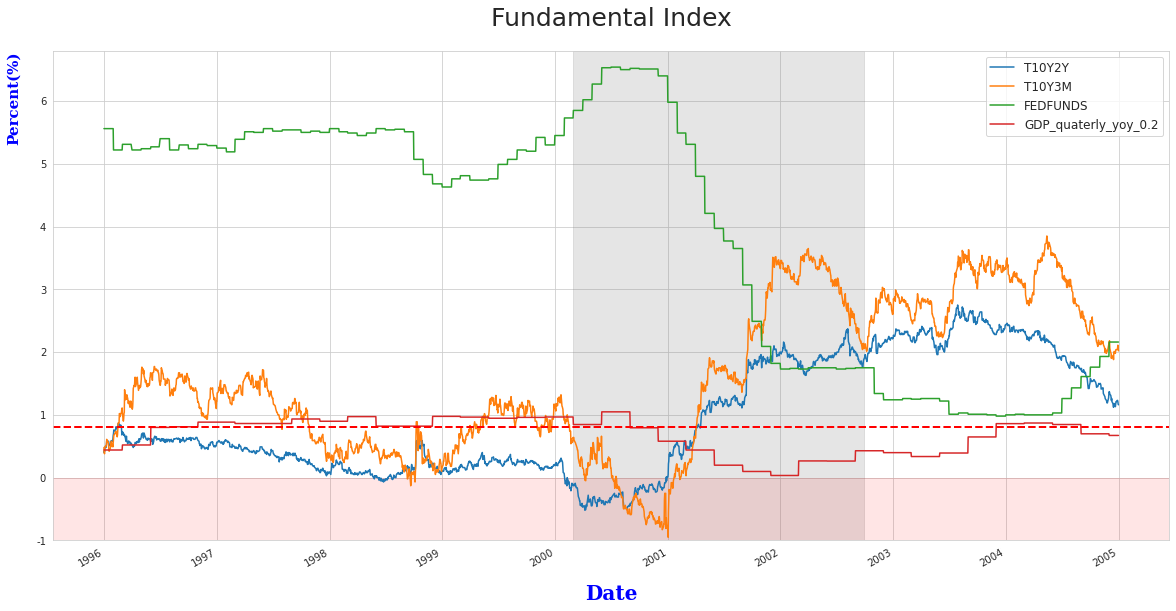

In [21]:
ax = df_00s[["T10Y2Y", "T10Y3M", "FEDFUNDS", 'GDP_quaterly_yoy_0.2']].plot()
# Recent Period GDP Average Groth Rate
gdp_avg = df_00s['GDP_quaterly_yoy_0.2'].mean()
plt.axhline(gdp_avg3, 0, 1, color='red', linestyle='--', linewidth=2)

# SubPrime Mortgage Crisis
ax.axvspan('2000-03-01', '2002-09-30', color='gray', alpha=0.2)
# Treasury < 0
ax.axhspan(0,-1, color='red', alpha=0.1)

plt.ylim(-1, 6.8)
plt.legend(loc='upper right', fontsize=12)
plt.title('Fundamental Index', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Percent(%)', fontsize=15, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')
# plt.savefig('Total Figure')

##### Detail Analysis 1

<br>

 - FEDFUNDS <br>
   1) Go sideways from 2004 to 2006 and then Decrease 1999  
   2) Increase from second half of 1999 to 2000 and then Decrease untill 2004
 - T10Y2Y & T10Y3M : Below Value 0 twice in 2006 April and after 2006 july until December
 - GDPC1 : Lower than Average Gdp Groth rate after 2001

<br>

 1) 2년, 3개월물 장단기 금리차
    - 0보다 낮은 값을 기록 : 주가 조정 후, 0보다 낮은 값 기록함. 그러나 그 이후 주가 붕괴<br>
    - Sub-Prime 대비 2배 정도 낮은 값을 기록 : 값에 따라 낙폭이 비례!<br>
 2) 연준의 기준 금리는 횡보 후 인하하고, 다시 인상을 실시하고 급격하게 인하함<br>
    - 심각한 버블이 형성되어, 연준이 직접 주가 하방 압력을 넣음 <br>
    - 폭락이 너무 심각하자 다시 금리 인하<br>
 3) GDP 성장률 : 1차 나스닥 폭락 후, 평균 값 이하로 내려옴

Text(0, 1, 'Percent(%)')

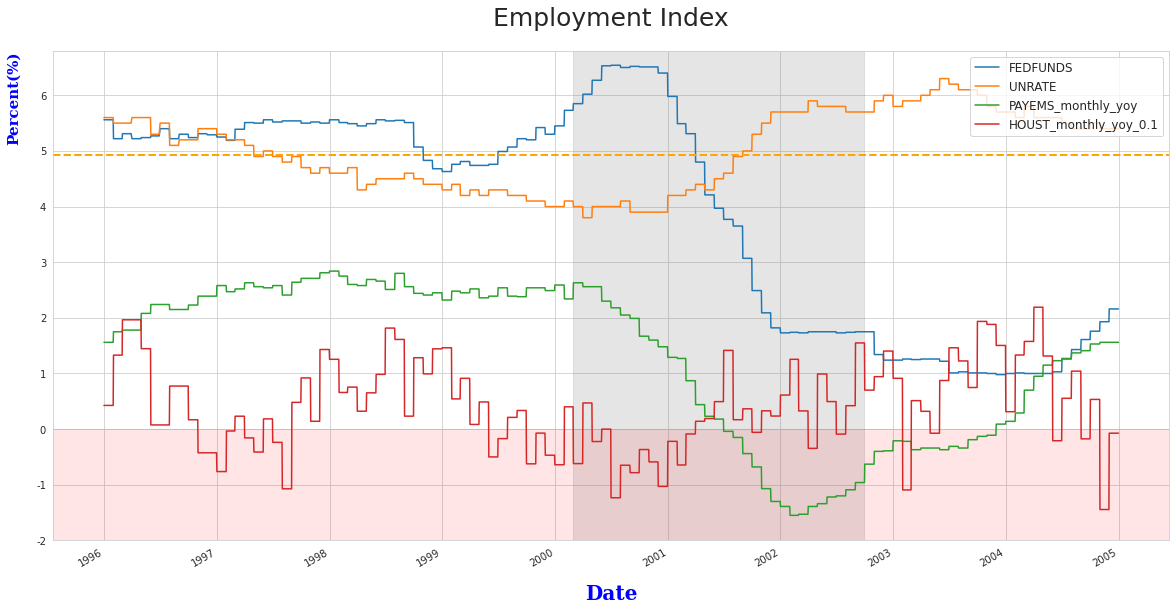

In [22]:
ax = df_00s[['FEDFUNDS','UNRATE', 'PAYEMS_monthly_yoy', 'HOUST_monthly_yoy_0.1']].plot()

plt.axhline(unrate_avg3, 0, 1, color='orange', linestyle='--', linewidth=2)
# Dot-com Bubble
ax.axvspan('2000-03-01', '2002-09-30', color='gray', alpha=0.2)
# Treasury < 0
ax.axhspan(0,-2, color='red', alpha=0.1)

plt.ylim(-2, 6.8)
plt.legend(loc='upper right', fontsize=12)
plt.title('Employment Index', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Percent(%)', fontsize=15, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')
# plt.savefig('Total Figure')

##### Detail Analysis 2

<br>

 - FEDFUNDS : See upper
 - UNRATE, PAYEMS : Appear to be fully employed over time
 - HOUST : Not related

 1) 고용 지표는 완전 고용 상태의 값으로 보임<br>
    - 모든 위기와 동일하게 완전 고용 후, 위기 발생<br>
 
 2) 신규 주택 착공은 관계없음

##### Conclusion 3 (Dot-COM Bubble Crisis)

<br>

-  NASDAQ (NASDAQCOM) : Down 33% from highs 
-  T10Y2Y, T10Y3M : Below 0 value, ocuured Crisis after 1 year
-  Federal Funds Effective Rate (`FEDFUNDS`) : Increase, go sideways And then Decrease before Crisis
-  New Privately-Owned Housing Units Started: Total Units (HOUST) : Not related
-  PAYEMS, UNRATE : Fully be employed
-  Real Gross Domestic Product (GDPC1) : Not related with Covid Crisis
-  BAMLH0A0HYM2 : Appear wide range of ups and downs many time (No tandancy)
-  PCEPILFE : Not important at this crisis

#### Inflation Period

+ Inflation Period (1970 ~ 1985)
 - First Energy Crisis - Inflation ('1973-01-04', '1974-10-01')
 - Second Energy Crisis - Inflation ('1980-01-01', '1980-05-01')
 - Double Dip Recession - Inflation ('1981-07-01', '1982-08-01')

In [23]:
inflation = total_data.loc[total_data['year'] <= 1983]

Text(0, 1, 'Percent(%)')

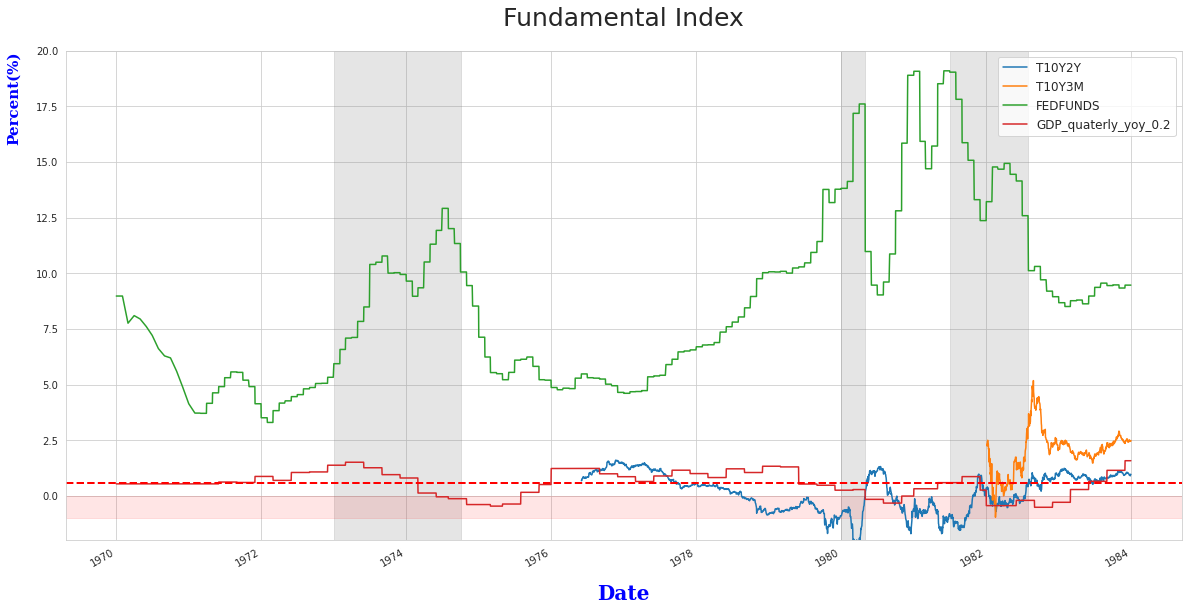

In [24]:
ax = inflation[["T10Y2Y", "T10Y3M", "FEDFUNDS", 'GDP_quaterly_yoy_0.2']].plot()
# Inflation Period GDP Average Groth Rate
gdp_avg = inflation['GDP_quaterly_yoy_0.2'].mean()
plt.axhline(gdp_avg, 0, 1, color='red', linestyle='--', linewidth=2)

# First Energy Crisis - Inflation
ax.axvspan('1973-01-04', '1974-10-01', color='gray', alpha=0.2)
# Second Energy Crisis - Inflation
ax.axvspan('1980-01-01', '1980-05-01', color='gray', alpha=0.2)
# Double Dip Recession - Inflation
ax.axvspan('1981-07-01', '1982-08-01', color='gray', alpha=0.2)
# Treasury < 0
ax.axhspan(0,-2, color='red', alpha=0.1)

plt.ylim(-2, 20)
plt.legend(loc='upper right', fontsize=12)
plt.title('Fundamental Index', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Percent(%)', fontsize=15, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')
# plt.savefig('Total Figure')

Text(0, 1, 'Percent(%)')

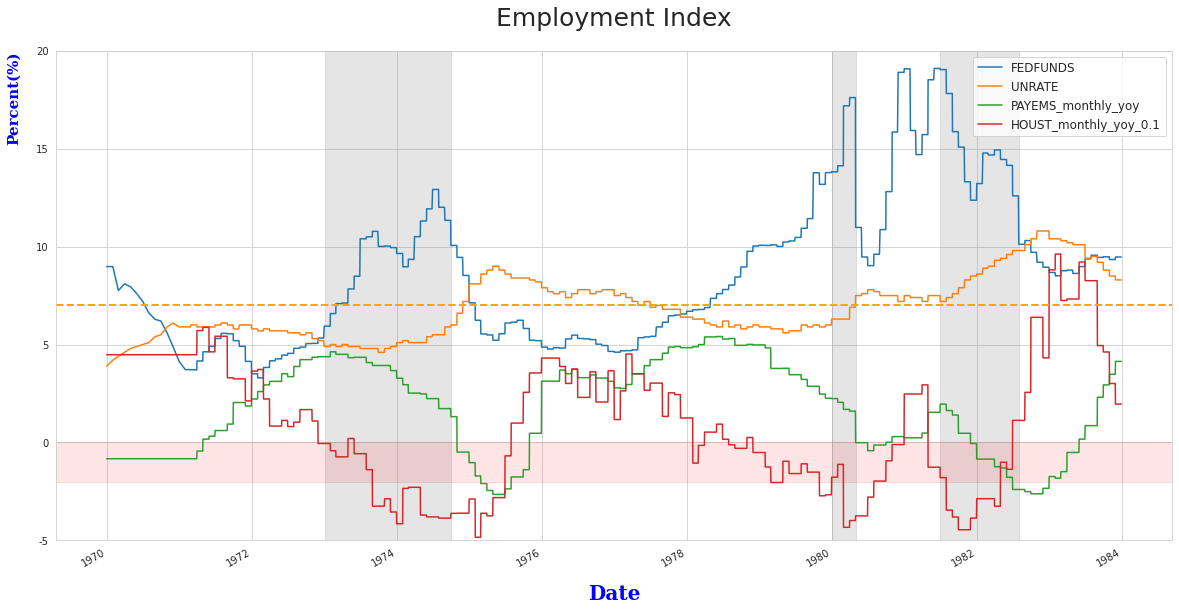

In [25]:
ax = inflation[['FEDFUNDS','UNRATE', 'PAYEMS_monthly_yoy', 'HOUST_monthly_yoy_0.1']].plot()
# Inflation Period GDP Average Groth Rate
unrate_avg_inf = inflation['UNRATE'].mean()
plt.axhline(unrate_avg_inf, 0, 1, color='orange', linestyle='--', linewidth=2)

# First Energy Crisis - Inflation
ax.axvspan('1973-01-04', '1974-10-01', color='gray', alpha=0.2)
# Second Energy Crisis - Inflation
ax.axvspan('1980-01-01', '1980-05-01', color='gray', alpha=0.2)
# Double Dip Recession - Inflation
ax.axvspan('1981-07-01', '1982-08-01', color='gray', alpha=0.2)
# Treasury < 0
ax.axhspan(0,-2, color='red', alpha=0.1)

plt.ylim(-5, 20)
plt.legend(loc='upper right', fontsize=12)
plt.title('Employment Index', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Percent(%)', fontsize=15, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')
# plt.savefig('Total Figure')

Text(0, 1, 'Percent(%)')

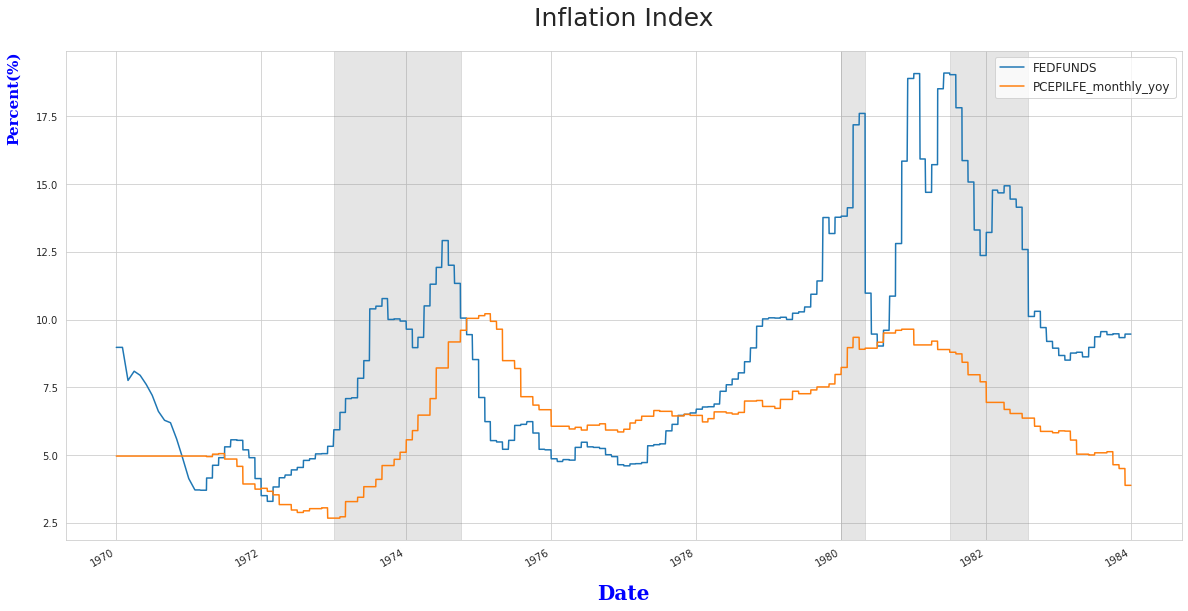

In [26]:
# No 'BAMLH0A0HYM2' data in 1980s
ax = inflation[['FEDFUNDS', 'PCEPILFE_monthly_yoy']].plot()

# First Energy Crisis - Inflation
ax.axvspan('1973-01-04', '1974-10-01', color='gray', alpha=0.2)
# Second Energy Crisis - Inflation
ax.axvspan('1980-01-01', '1980-05-01', color='gray', alpha=0.2)
# Double Dip Recession - Inflation
ax.axvspan('1981-07-01', '1982-08-01', color='gray', alpha=0.2)

# plt.ylim(0, 10)
plt.legend(loc='upper right', fontsize=12)
plt.title('Inflation Index', fontsize=25, pad=25)
plt.xlabel('Date', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('Percent(%)', fontsize=15, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'}, loc='top')

#### Review comments

<br>

1) 10/2년 국채 장단기 금리차 (T10Y2Y) & 10년/3개월 국채 장단기 금리차 (T10Y3M) 
 - 두 지표 모두 *0보다 작은 경우*, 대부분의 *경기 침체가 시작*
 - But 2007년(Sub-Prime)의 경우 1년 정도 빠르게 나타나면서, NASDAQ 기준으로 10% 상승 이후, -50%를 기록함. 즉, 10% 상승기 동안 비중을 천천히 줄여나가는 전략이 필요.
 - 2020년(COVID)의 경우 약 3일만 0보다 작은 지표를 보여주고 고점 대비 -30%를 기록함.
 - 2000년(DOT-COM)의 경우 T10Y3M 기준으로 -0.95%의 강한 지표를 보여주며, -70% 이상의 폭락을 보여줌.
 - **선행 지표로 삼는 것은 적절해보이며, T10Y3M 최저점의 값에 따라 NADAQ의 낙폭이 비례함함** => 정확도 100%

<br>

2) 미국 연방 기금 금리 (FEDFUNDS) 
 - Dot-Com 버블을 제외하고 모두 금리를 동결시키고 인하하기 시작하면, 경제 위기가 시작됨.
 - 2000년 닷컴버블은 지나친 주가 상승으로 인해, 금리 인하를 미룬 것으로 파악되며, 특수성을 가졌다고 판단
 - 따라서 금리 동결 후 인하는 **선행 지표로 불 수 있다.**

<br>


3) 미국 신규 주택 착공 증가율 (HOUST) : DATA를 한 그래프에 표현하기 위해, Annualy 증감율로 표현했고 value를 /10을 함.
 - 2000년 Dot-Com Bubble, 2020년 COVID를 제외하고 금융위기 전에 급격하게 감소함. 
 - 증감율 기준으로 -20%가 되면 위기의 선행 지표로 볼 수 있을 것으로 보이고 위기의 정점에선 -40%까지 떨어지는 것으로 확인
 - 즉 모든 위기 전에 -20% ~ -40%를 기록한 것은 아니나, **-20%를 기록하면, 위기가 왔음**
 - **선행지표로 볼 수 있으나, 100%는 아님**

<br>


4) 미국 고용 인구 증가율 (PAYEMS)
 - 위기가 시작되면 급격하게 감소함
 - 또한 약 2년전 퍼센트 증감율에 비해 급격히 감소하고 FEDFUNDS도 같이 동결 및 인하 시엔 위기 발생함
 - But FEDFUNDS와 PAYEMS 모두 감소하는 시기(1980s/90s 중반)도 있으나, 위기는 안왔음.
   => 적절한 금리 인하로 경제 위기 모면했다고 해석됨
 - 즉 **선행 지표**로 볼 수 있으나, 장단기 금리차와 함께 봐야함